<a href="https://colab.research.google.com/github/ipsita617/Machine-learning-/blob/main/decision_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
a=[2,3,2,3,4,6,3,4,4,4,4,1,2,1,2,0]
#finding unique elements in a
unique=[]
unique.append(a[0])
for ele in a:
  for val in unique:
    if(ele != val):
      unique.append(ele)
      break

print(unique)      

[2, 3, 2, 3, 4, 6, 3, 4, 4, 4, 4, 1, 2, 1, 2, 0]


In [ ]:
import pandas as pd #for one hot encoding and manipulating data
import numpy as np #to calculate mean and std. deviation
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier #to build classification tree
from sklearn.tree import plot_tree # to draw classification tree
from sklearn.model_selection import train_test_split #to split data
from sklearn.model_selection import  cross_val_predict #for cross validation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix


In [ ]:
# df=pd.read_csv('processed.cleveland.data',header=None)
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data',header=None)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:
df.columns=['age', #change column number to names
            'sex', # 0:female,1:male
            'cp', # chest pain -> 1:typical angina,2:atypical angina,3:non-anginal pain,4:asymptomatic
            'restbp', #resting blood pressure (in mm Hg),Float
            'chol', #serum cholestrol
            'fbs', #fasting blood sugar, Category -> 0 =>120mg/dl, 1=<120 mg/dl
            'restecg', #resting electrocardiographic results,Category -> 1=normal,2: ST-T wave abnormality,3: probable/definite left ventricular hypertrophy
            'thalach',#maximum heart rate achieved
            'exang', #exercise induced angina, 0=no,1=yes 
            'oldspeak',#ST depression induced by exercise relative to rest
            'slope', #slope of peak exercise ST segment -> 1=unsloping,2=flat,3=downsloping
            'ca',#no.of major vessels(0-3) coloured by fluroscopy
            'thal', #thalium heart scan -> 3=normal,6=fixed defect(cold spots during rest and exercise)
            'hd' ] #heart disease 
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldspeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:
# identifying and dealing with missing data
df.dtypes 

age         float64
sex         float64
cp          float64
restbp      float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldspeak    float64
slope       float64
ca           object
thal         object
hd            int64
dtype: object

In [ ]:
df['ca'].unique() #object data type have mixture of things(numbers and letters)

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [ ]:
df['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [ ]:
#since scikit-learn's classification trees do not support dataset with missing values ,we can either
#delete these patients or impute (smart guess) values for missing data points.
len(df.loc[(df['ca'] == '?') | (df['thal']== '?')]) #how many rows have '?

6

In [ ]:
df.loc[(df['ca'] == '?') | (df['thal']== '?')]

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldspeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [ ]:
len(df)

303

In [ ]:
# pruning the missing values

In [ ]:
#deleting the rows with missing values
data_without_missing_value=df.loc[(df['ca'] != '?') & (df['thal'] != '?')]

In [ ]:
len(data_without_missing_value)

297

In [ ]:
#verifying the data again for no missing value
data_without_missing_value['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

In [ ]:
data_without_missing_value['thal'].unique()

array(['6.0', '3.0', '7.0'], dtype=object)

In [ ]:
#format the data: split the data into 2 parts for training and testing
training_data=data_without_missing_value.drop('hd',axis=1).copy()
training_data.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldspeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [ ]:
test_column=data_without_missing_value['hd'].copy()
test_column.head()

0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64

In [ ]:
# Since whole dataset is float64, we want to modify datatypes according to
# categories .Sk-learn takes only continous values of data so categories have been assigned numbers 
# But numbers create a relation between them of weitage which we do not want as blood group  are equal valued but different.
# So we have to one-hot encode the categorical columns.

In [ ]:
pd.get_dummies(training_data,columns=['cp']).head()

,age,sex,restbp,chol,fbs,restecg,thalach,exang,oldspeak,slope,ca,thal,cp_1.0,cp_2.0,cp_3.0,cp_4.0
0,63.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,1,0,0,0
1,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,0,0,0,1
2,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,1,0
4,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,1,0,0


In [ ]:
training_data_encoded=pd.get_dummies(training_data,columns=['cp',
                                                            'restecg',
                                                            'slope',
                                                            'thal'])
training_data_encoded.head()

,age,sex,restbp,chol,fbs,thalach,exang,oldspeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0


In [ ]:
# test_column has five different levels(0 to 4 in value) of heart disease so we
#need to convert numbers>0 as 1
test_column.unique() 

array([0, 2, 1, 3, 4])

In [ ]:
# for simple classification implementation of trees, we convert hd from 0 to 1 
test_column_not_zero= test_column>0
test_column[test_column_not_zero]=1
test_column.unique()

array([0, 1])

In [ ]:
# Building the Classification Tree
X_train ,X_test, y_train,y_test=train_test_split(training_data_encoded,test_column,random_state=42)
decision_tree=DecisionTreeClassifier(random_state=42)
decision_tree=decision_tree.fit(X_train,y_train)

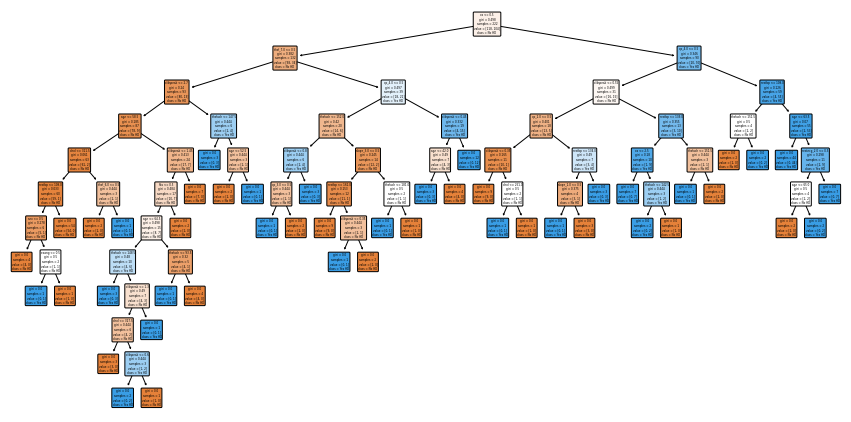

In [ ]:
plt.figure(figsize=(15,7.5))
plot_tree(decision_tree,
              filled=True,
              rounded=True,
              class_names=["No HD","Yes HD"],
              feature_names=training_data_encoded.columns);

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


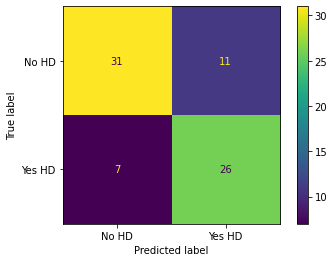

In [ ]:
plot_confusion_matrix(decision_tree,X_test,y_test,display_labels=["No HD","Yes HD"])

In [ ]:
from sklearn.metrics import classification_report
y_pred_en = decision_tree.predict(X_test)
print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       0.82      0.74      0.78        42
           1       0.70      0.79      0.74        33

    accuracy                           0.76        75
   macro avg       0.76      0.76      0.76        75
weighted avg       0.77      0.76      0.76        75



In [ ]:
#check accuracy score with criterion entropy
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.7600


In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(decision_tree.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(decision_tree.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.7600


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       0.82      0.74      0.78        42
           1       0.70      0.79      0.74        33

    accuracy                           0.76        75
   macro avg       0.76      0.76      0.76        75
weighted avg       0.77      0.76      0.76        75



In [ ]:
# train_scores=[decision_tree.score(X_train,y_train) for tree in decision_tree]
# test_scores=[decision_tree.score(X_test,y_test) for tree in decision_tree]
# fig, ax=plt.subplots()
# ax.set_xlabel("alpha")
# ax.set_ylabel("accuracy")
# ax.set_title("Accuracy vs alpha for training and testing sets")
# ax.plot()

In [ ]:
# 
import numpy as np
import pandas as pd
import requests

In [ ]:
class Node(object):
    def __init__(self,value,is_leaf=False):
        self.value = value
        self.left = None
        self.right = None
        self.gini_value = None
        self.col_index = None
        self.is_leaf = is_leaf

In [ ]:
# data=[['2'],['4']]
# p=list(set(int(row[-1])) for row in data)
# # print(p)

In [ ]:
class decision_tree_classifier(object):
    def __init__(self,min_samples=10,min_gini=0.2,max_depth=5):
        self.root = None
        self.min_samples = min_samples
        self.min_gini = min_gini
        self.max_depth = max_depth
        self.classes = None
        
    def fit(self,data):
        self.classes = list(set(int(row[-1]) for row in data))
        self.root = self.create_node(data) 
        self.build_tree(self.root,current_depth = 0)
        return self.root
    
    def create_node(self,data):
        node = Node(None)
        
        ### checking if node can be further split using minimum gini as criterion
        gini_score = self.gini_index(data)
        if gini_score <= self.min_gini:
            node.is_leaf = True
            node.value = np.bincount([row[-1] for row in data]).argmax()
            node.gini_value = gini_score
            return node
        
        ### checking if node has enough samples to be split again 
        if len(data) <= self.min_samples:
            node.is_leaf = True
            node.value = np.bincount([row[-1] for row in data]).argmax()
            node.gini_value = gini_score
            return node

        
        ### finding minimum gini impurity split 
        gini_index = 1.0
        for col_index in range(len(data[0])-1):
            for row_index in range(len(data)):
                value = data[row_index][col_index]
                child = self.get_split(data,col_index,value)
                node_gini_index = self.calculate_gini_index(value,child)
                if node_gini_index < gini_index:
                    gini_index = node_gini_index
                    node.value = value
                    node.gini_value = node_gini_index
                    node.col_index = col_index
                    node.left = child['l']
                    node.right = child['r']
        return node
    def gini_index(self,data):
        size = len(data)
        instances = [0] * len(self.classes)
        for row in data:
            instances[int(row[-1])] += 1
        return 1 - np.sum([(val/size)**2 for val in instances]) if size > 0 else 1

    def calculate_gini_index(self,value,child):
        group_size = [len(child['l']),len(child['r'])] 
        left_gini = self.gini_index(child['l'])
        right_gini =  self.gini_index(child['r'])
        return (group_size[0]/np.sum(group_size) * left_gini) + (group_size[1]/np.sum(group_size) * right_gini)

    def get_split(self,data,col_index,value):
        left_child, right_child = [], []
        for index in range(len(data)):
            if data[index][col_index] < value:
                left_child.append(data[index])
            if data[index][col_index] > value:
                right_child.append(data[index])
        return {'l':left_child, 'r':right_child}

    def build_tree(self,node,current_depth):
        ## create left subtree for the node if possible under constraints
        if  current_depth < self.max_depth:
            ## creating left node 
            if node.left is not None and isinstance(node.left,list):
                left_node = self.create_node(node.left)
                node.left = left_node
                if node.left.is_leaf is not True:
                    self.build_tree(node.left,current_depth+1)
            if node.right is not None and isinstance(node.right,list):
            ## creating right node
                right_node = self.create_node(node.right)
                node.right = right_node
                if node.right.is_leaf is not True:
                    self.build_tree(node.right,current_depth+1)
                    
    def traverse(self):
        tree = {'root':str(self.root.value)}
        stack = [self.root]
        node = self.root
        while len(stack) > 0:
            while node is not None:
                stack.append(node)
                node = node.left            
            node = stack.pop(-1)
            if node.is_leaf is not True:
                tree[str(node.value)] = {'left':node.left.value,'right':node.right.value,'feature':node.col_index,'gini value':node.gini_value}
            else:
                tree[str(node.value)] = {'left':'None','right':'None','class label':node.value,'gini value':node.gini_value,'leaf':True}
            node = node.right
        return tree

    def predict(self,sample):
        predictions = []
        for row in sample:
            node = self.root
            while node.is_leaf is not True:
                if row[node.col_index] < node.value:
                    node = node.left
                    continue
                if row[node.col_index] >= node.value:
                    node = node.right
            predictions.append(node.value)
        return predictions

In [ ]:
def accuracy(data):
    dt = decision_tree_classifier()
    tree = dt.fit(data)
    print('<========= decision tree ===========>')
    print(dt.traverse())
    predictions = dt.predict(data[0:-1][0:-1])
    true_values = [row[-1] for row in data]
    return '{:1f}'.format(sum([t==p for t,p in zip(true_values, predictions)])/len(true_values) *100 ) + '% accuracy' 
 
 
def flower_to_id(value):
    if value == 'Iris-virginica':
        return 2
    if value == 'Iris-versicolor':
        return 0
    if value == 'Iris-setosa':
        return 1


def get_data():
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
    values = requests.get(url).content.decode('utf-8').split('\n')
    data_set = [val.split(',') for val in values]
    data_df = pd.DataFrame(data=data_set,columns=['sepal_length','sepal_width','petal_length','petal_width','flower'])
    data_df = data_df.dropna()
    data_df[['sepal_length','sepal_width','petal_length','petal_width']] = data_df[['sepal_length','sepal_width','petal_length','petal_width']].astype('float')
    data_df['flower'] = data_df['flower'].map(flower_to_id)
    return data_df
    
data = get_data()
print(accuracy(data.to_numpy()))

<========= decision tree ===========>
{'root': '1.0', '1': {'left': 'None', 'right': 'None', 'class label': 1, 'gini value': 0.0, 'leaf': True}, '1.0': {'left': 1, 'right': 1.7, 'feature': 3, 'gini value': 0.32333258139709753}, '0': {'left': 'None', 'right': 'None', 'class label': 0, 'gini value': 0.1619753086419753, 'leaf': True}, '1.7': {'left': 0, 'right': 2, 'feature': 3, 'gini value': 0.10159791898922337}, '2': {'left': 'None', 'right': 'None', 'class label': 2, 'gini value': 0.04253308128544431, 'leaf': True}}
94.666667% accuracy


In [ ]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,flower
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [ ]:
data['flower'].unique()

array([1, 0, 2])

In [ ]:
data_encoded=pd.get_dummies(data,columns=['flower'])
data_encoded.head()


,sepal_length,sepal_width,petal_length,petal_width,flower_0,flower_1,flower_2
0,5.1,3.5,1.4,0.2,0,1,0
1,4.9,3.0,1.4,0.2,0,1,0
2,4.7,3.2,1.3,0.2,0,1,0
3,4.6,3.1,1.5,0.2,0,1,0
4,5.0,3.6,1.4,0.2,0,1,0


In [ ]:
print(data_encoded['flower_0'].unique(),data_encoded['flower_1'].unique(),data_encoded['flower_2'].unique())

[0 1] [1 0] [0 1]


In [ ]:

X_train ,X_test, y_train,y_test=train_test_split(data_encoded.drop(['flower_0','flower_1','flower_2'],axis=1),data_encoded['flower_0'],random_state=42)
decision_tree=DecisionTreeClassifier(random_state=42)
decision_tree=decision_tree.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


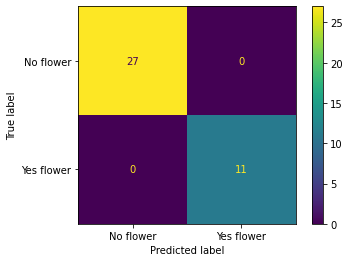

In [ ]:
plot_confusion_matrix(decision_tree,X_test,y_test,display_labels=["No flower","Yes flower"])

In [ ]:
from sklearn.metrics import classification_report
y_pred_en = decision_tree.predict(X_test)
print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        11

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

